### Required Packages

In [2]:
# Packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.utils import to_categorical

### Load the Data

In [3]:
# read in the data
df = pd.read_csv('sephora_reviews_final.csv')

In [4]:
# data Overview
df.head()

,brand,name,product_id,coverage,finish,formulation,normal_skin,oily_skin,combo_skin,dry_skin,...,age,beauty_insider,price,first_submission_date,last_submission_date,location,incentivized_review,review_text,brand_image_url,product_image_url
0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-01-06 01:04:26,2018-12-08 05:44:51,NaN,NaN,Really good foundation I like it a lot but som...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
1,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-10-19 00:29:37,2018-12-07 15:16:13,NaN,NaN,"As someone who is very VERY fair, I have alway...",/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-02-05 21:40:40,2018-12-08 19:07:33,NaN,NaN,First purchase of a foundation of any kind. Wa...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
3,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-05-09 00:32:04,2018-12-03 09:54:03,NaN,NaN,I absolutely love this foundation! I get compl...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-12-03 00:40:58,2018-12-06 02:32:21,NaN,NaN,Love this foundation! I was using Too Faced Bo...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...


In [5]:
# list column names
list(df.columns)

['brand',
 'name',
 'product_id',
 'coverage',
 'finish',
 'formulation',
 'normal_skin',
 'oily_skin',
 'combo_skin',
 'dry_skin',
 'SPF',
 'user_name',
 'rating',
 'recommended',
 'skin_type',
 'eye_color',
 'skin_tone',
 'skin_concerns',
 'age',
 'beauty_insider',
 'price',
 'first_submission_date',
 'last_submission_date',
 'location',
 'incentivized_review',
 'review_text',
 'brand_image_url',
 'product_image_url']

In [6]:
# drop the columns that is unnecessary
df = df[df.columns[~df.columns.isin(['first_submission_date','last_submission_date','brand_image_url','product_image_url'])]]

In [7]:
df.head()

,brand,name,product_id,coverage,finish,formulation,normal_skin,oily_skin,combo_skin,dry_skin,...,skin_type,eye_color,skin_tone,skin_concerns,age,beauty_insider,price,location,incentivized_review,review_text
0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,oily,brown,tan,acne,NaN,NaN,34.0,NaN,NaN,Really good foundation I like it a lot but som...
1,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,combination,brown,porcelain,acne,NaN,NaN,34.0,NaN,NaN,"As someone who is very VERY fair, I have alway..."
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,combination,brown,dark,darkCircles,NaN,NaN,34.0,NaN,NaN,First purchase of a foundation of any kind. Wa...
3,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,combination,brown,dark,acne,NaN,NaN,34.0,NaN,NaN,I absolutely love this foundation! I get compl...
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,combination,green,fair,darkCircles,NaN,NaN,34.0,NaN,NaN,Love this foundation! I was using Too Faced Bo...


In [8]:
# dimension of the dataset
df.shape

(275950, 24)

## 1. Data Pre-Processing

### 1.1 Missing Data

In [9]:
# calculate the percentage of missing data in each column
(df.isnull().sum() / len(df)).sort_values(ascending=False)

skin_concerns          0.743196
incentivized_review    0.712183
recommended            0.703907
beauty_insider         0.597793
location               0.587683
age                    0.566784
skin_type              0.513089
formulation            0.440852
eye_color              0.356782
skin_tone              0.337391
finish                 0.321986
coverage               0.318268
user_name              0.010654
normal_skin            0.000000
name                   0.000000
product_id             0.000000
review_text            0.000000
oily_skin              0.000000
combo_skin             0.000000
dry_skin               0.000000
SPF                    0.000000
rating                 0.000000
price                  0.000000
brand                  0.000000
dtype: float64

In [10]:
# drop the rows that has NA in "recommended"
df = df[pd.notnull(df['recommended'])]
df.shape

(81707, 24)

In [11]:
# percentage of missing data in each column after removing the missing data in "recommended"
(df.isnull().sum() / len(df)).sort_values(ascending=False)

location               1.000000
beauty_insider         1.000000
incentivized_review    1.000000
age                    0.896459
formulation            0.474464
finish                 0.355245
coverage               0.354486
skin_concerns          0.132694
eye_color              0.068268
skin_tone              0.047377
skin_type              0.046459
user_name              0.004639
oily_skin              0.000000
name                   0.000000
product_id             0.000000
normal_skin            0.000000
review_text            0.000000
combo_skin             0.000000
dry_skin               0.000000
SPF                    0.000000
rating                 0.000000
recommended            0.000000
price                  0.000000
brand                  0.000000
dtype: float64

In [12]:
# remove the columns that has no data
df = df[df.columns[~df.columns.isin(['location','beauty_insider','incentivized_review','user_name'])]]

In [13]:
# fill the NA with mode
cols = ['age','formulation','finish','coverage','skin_concerns','eye_color','skin_tone','skin_type']
df[cols]=df[cols].fillna(df.mode().iloc[0])

### 1.2 Recoding

In [14]:
# select the boolean variables
boolean_cols = ['normal_skin','oily_skin','combo_skin','dry_skin','SPF','recommended']

# recode as 1 and 0
le = LabelEncoder()
df[boolean_cols] = df[boolean_cols].apply(lambda col: le.fit_transform(col))

In [15]:
# label encode the age column
le.fit(df['age'])
df['age'] = le.transform(df['age']) 

In [16]:
# select the categorical variables
categorical_cols = ['finish','formulation','coverage','skin_type','eye_color','skin_tone','skin_concerns']

# apply one hot encoding
categorical_dummies = pd.get_dummies(df[categorical_cols])

In [17]:
# remove the columns that have been recoded
df = df[df.columns[~df.columns.isin(categorical_cols)]]

# combine the new feature columns with the original dataframe
df = pd.concat([df, categorical_dummies], axis=1)
df.head()

,brand,name,product_id,normal_skin,oily_skin,combo_skin,dry_skin,SPF,rating,recommended,...,skin_concerns_cuticles,skin_concerns_darkCircles,skin_concerns_dullness,skin_concerns_pores,skin_concerns_puffiness,skin_concerns_redness,skin_concerns_sensitivity,skin_concerns_stretchMarks,skin_concerns_sunDamage,skin_concerns_unevenSkinTones
0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,4,1,...,0,0,0,0,0,0,0,0,0,0
1,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0,0,0,0,0,0,0,0,0,0
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0,1,0,0,0,0,0,0,0,0
3,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0,0,0,0,0,0,0,0,0,0
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0,1,0,0,0,0,0,0,0,0


### 1.3 Text data

#### 1.3.1 Sentiment Score

In [18]:
# create a function to calculate the sentiment score of every review
def sentiscore(text):
    analyzer = SentimentIntensityAnalyzer()
    senti_score = analyzer.polarity_scores(text)['compound']
    return senti_score

In [19]:
# create a new column to contain the sentiment score
df['senti_score'] = df['review_text'].apply(sentiscore)

In [20]:
df.head()

,brand,name,product_id,normal_skin,oily_skin,combo_skin,dry_skin,SPF,rating,recommended,...,skin_concerns_darkCircles,skin_concerns_dullness,skin_concerns_pores,skin_concerns_puffiness,skin_concerns_redness,skin_concerns_sensitivity,skin_concerns_stretchMarks,skin_concerns_sunDamage,skin_concerns_unevenSkinTones,senti_score
0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,4,1,...,0,0,0,0,0,0,0,0,0,0.7674
1,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0,0,0,0,0,0,0,0,0,0.9578
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,1,0,0,0,0,0,0,0,0,0.8910
3,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0,0,0,0,0,0,0,0,0,0.8970
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,1,0,0,0,0,0,0,0,0,0.9557


#### 1.3.2 TFIDF matrix

In [21]:
# define the stopword list
stop_words = set(stopwords.words('english'))

# update the stopword with some common words related to foundation
stop_words.update(['foundation','skin', 'make', 'product', 'face', 
                  'really', 'work', 'use', 'tried', 'color', 'got', 'say', 'actually',
                 'using', 'used', 'one', 'two', 'three', 'four','five', 'definitely', 'absolutely',
                 'bought', 'found', 'still', 'makeup', 'made', 'look', 'feel', 'will', 'though',
                 'little', 'find', 'seem', 'looked','much', 'lot', 'even', 'love', 'return', 'however','also',
                  'always','around','bit','ever','every','feels','first','get','give','gives','go','goes','lasts','put',
                  'received','since','way','wanted','would','without','sephora','think','beautiful','beauty','blends',
                  'best','better','could','buy','good','great','like','looking','looks','many','perfect','usually','want',
                  'felt','loved'])

In [22]:
# apply tfidf
tfidf = TfidfVectorizer(stop_words = stop_words, use_idf = True, max_features = 100)
feature_matrix = tfidf.fit_transform(df['review_text'])

In [23]:
tfidf.get_feature_names()

['acne',
 'amazing',
 'application',
 'applied',
 'apply',
 'back',
 'bad',
 'blend',
 'blender',
 'bottle',
 'break',
 'brush',
 'buildable',
 'cakey',
 'combination',
 'combo',
 'complimentary',
 'concealer',
 'cover',
 'coverage',
 'covers',
 'cream',
 'dark',
 'day',
 'dewy',
 'different',
 'dry',
 'easy',
 'end',
 'enough',
 'far',
 'favorite',
 'finish',
 'flawless',
 'formula',
 'foundations',
 'free',
 'full',
 'going',
 'hard',
 'heavy',
 'hours',
 'influenster',
 'last',
 'light',
 'lightweight',
 'lines',
 'long',
 'makes',
 'match',
 'matched',
 'matches',
 'matte',
 'medium',
 'moisturizer',
 'natural',
 'need',
 'never',
 'new',
 'nice',
 'nose',
 'oil',
 'oily',
 'patches',
 'perfectly',
 'pores',
 'powder',
 'pretty',
 'price',
 'primer',
 'products',
 'range',
 'recommend',
 'right',
 'sample',
 'see',
 'set',
 'setting',
 'shade',
 'shades',
 'smooth',
 'something',
 'spf',
 'stays',
 'stick',
 'summer',
 'super',
 'sure',
 'texture',
 'throughout',
 'time',
 'tone',


In [24]:
# create the tfidf dataframe
TFIDF = pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names())

In [25]:
# conbine the TFDIF dataframe with the origin dataframe
df.reset_index(drop=True, inplace=True)
TFIDF.reset_index(drop=True, inplace=True)
new_df = pd.concat([df, TFIDF], axis=1)

# drop the 'review_text' column
new_df.drop('review_text', axis=1, inplace=True)

In [26]:
new_df.head()

,brand,name,product_id,normal_skin,oily_skin,combo_skin,dry_skin,SPF,rating,recommended,...,time,tone,try,wear,wearing,well,went,works,worth,years
0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,4,1,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0.204631,0.000000,0.00000,0.201095,0.0,0.0,0.0,0.000000,0.0,0.0
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0.262965,0.000000,0.27388,0.000000,0.0,0.0,0.0,0.315076,0.0,0.0
3,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,1,1,1,1,0,5,1,...,0.000000,0.412108,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


### 1.4 Feature Selection: Recursive Feature Elimination

#### 1.4.1 Without review text feature

In [27]:
# without review text
y_lite = new_df['recommended']

# drop the brand column and product name column
X_lite = new_df.loc[:, new_df.columns != 'recommended']
X_lite = X_lite.loc[:, X_lite.columns != 'rating']
X_lite = X_lite.iloc[:, 3:55]

In [28]:
# fit the REF model
rfecv_lite = RFECV(LogisticRegression(random_state=101), step=1, cv=StratifiedKFold(10), scoring='accuracy',n_jobs=-1)
rfecv_lite.fit(X_lite, y_lite)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=-1, scoring='accuracy', step=1, verbose=0)

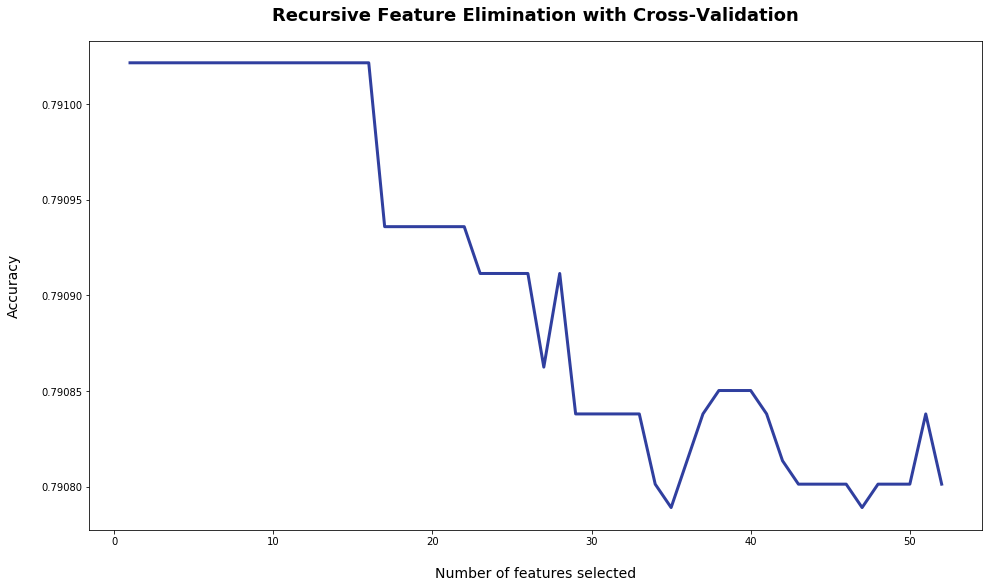

In [29]:
# plot the result
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv_lite.grid_scores_) + 1), rfecv_lite.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [30]:
# print the optimal number of predictors
print('Optimal number of features: {}'.format(rfecv_lite.n_features_))

Optimal number of features: 16


In [31]:
print(np.where(rfecv_lite.support_ == True)[0])

[ 1  4  7 10 11 14 16 17 18 28 29 30 34 35 36 48]


In [32]:
# list the optimal predictors
X_lite.drop(X_lite.columns[np.where(rfecv_lite.support_ == False)[0]], axis=1, inplace=True)

X_lite.columns

Index(['oily_skin', 'SPF', 'finish_Matte', 'formulation_Cream',
       'formulation_Liquid', 'formulation_Pressed', 'coverage_Full',
       'coverage_Light', 'coverage_Medium', 'skin_tone_dark', 'skin_tone_deep',
       'skin_tone_ebony', 'skin_tone_olive', 'skin_tone_porcelain',
       'skin_tone_tan', 'skin_concerns_sensitivity'],
      dtype='object')

In [33]:
# split the dataset into training and testing
X_train_lite, X_test_lite, y_train_lite, y_test_lite = train_test_split(X_lite, y_lite, random_state=42)

#### 1.4.2 With review text feature

In [34]:
# with review text
y = new_df['recommended']

# drop the brand column and product name column
X = new_df.loc[:, new_df.columns != 'recommended']
X = X.loc[:, X.columns != 'rating']
X = X.iloc[:, 3:]

In [35]:
# fit the REF model
rfecv = RFECV(estimator=LogisticRegression(random_state=101), step=1, cv=StratifiedKFold(10), scoring='accuracy',n_jobs=-1)
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=-1, scoring='accuracy', step=1, verbose=0)

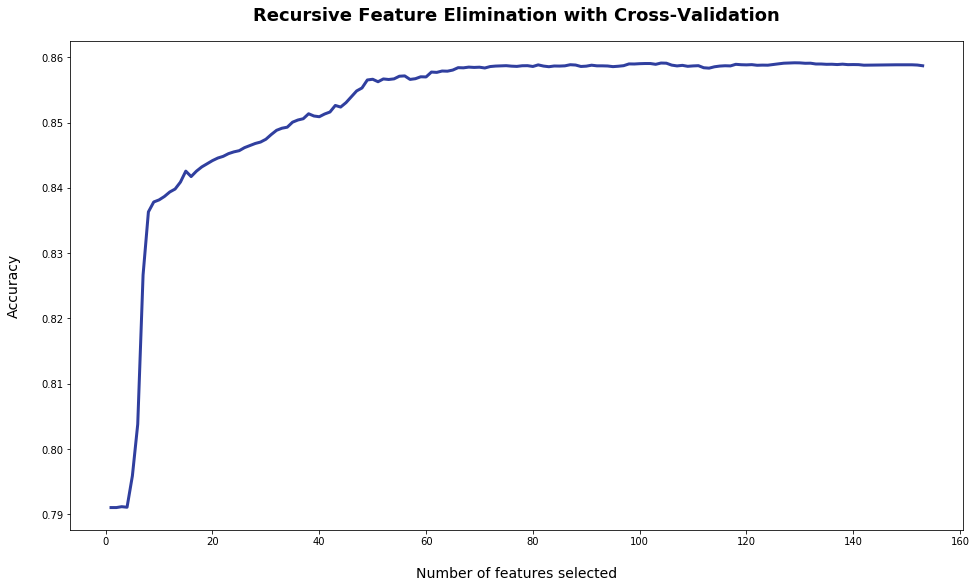

In [36]:
# plot the result
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('Accuracy', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [37]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 129


In [38]:
# list the optimal predictors
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

X.columns

Index(['normal_skin', 'oily_skin', 'dry_skin', 'SPF', 'finish_Matte',
       'finish_Natural', 'formulation_Cream', 'formulation_Liquid',
       'formulation_Loose', 'formulation_Pressed',
       ...
       'throughout', 'tone', 'try', 'wear', 'wearing', 'well', 'went', 'works',
       'worth', 'years'],
      dtype='object', length=128)

In [39]:
# split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 1.5 Resampling

In [40]:
# Check the balance of trainig data
counts=y_train.value_counts()
percentage=round((y_train.value_counts(normalize=True)),4)*100
distribution=pd.concat([counts, percentage], axis=1)
distribution.columns=['Counts','Percentage']
distribution.rename(index={1:'recommend',0:'not recommend'}, inplace=True)
distribution

,Counts,Percentage
recommend,48467,79.09
not recommend,12813,20.91


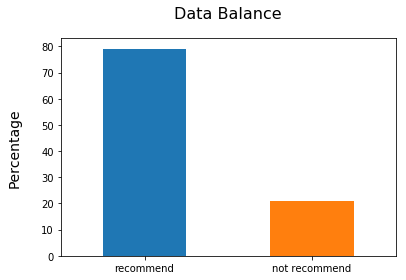

In [41]:
# plot the distribution
distribution.plot(kind='bar',x=distribution.index.name,y='Percentage',legend=None)
plt.title('Data Balance', fontsize=16, pad=20)
plt.ylabel('Percentage', fontsize=14, labelpad=20)
plt.xticks(rotation=0)
plt.show()

In [42]:
# lite version undersampling
rus_lite = RandomUnderSampler(random_state=0)
X_train_lite, y_train_lite = rus_lite.fit_sample(X_train_lite, y_train_lite)

y_train_lite = pd.Series(y_train_lite)
X_train_lite = pd.DataFrame(X_train_lite, columns=X_lite.columns)

print(y_train_lite.value_counts())

1    12813
0    12813
dtype: int64


In [43]:
# full version undersampling
rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_sample(X_train, y_train)

y_train = pd.Series(y_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

print(y_train.value_counts())

1    12813
0    12813
dtype: int64


## 2.  Comparative Analysis

### 2.1 Logistic Regression

#### Without review text

In [44]:
# list the parameters
param_grid_logistic_lite = {'C': [0.01, 0.1, 1, 10, 100],
                            'penalty':['l1', 'l2']}

# tuning parameters using cross-validation
grid_logistic_lite = GridSearchCV(LogisticRegression(random_state=42), param_grid=param_grid_logistic_lite, cv=10,n_jobs=-1)

# fit the model
grid_logistic_lite.fit(X_train_lite, y_train_lite)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
# best parameter and score
print("Best parameters: ", grid_logistic_lite.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_logistic_lite.best_score_))
print("Best test-set score: {:.3f}".format(grid_logistic_lite.score(X_test_lite, y_test_lite)))

Best parameters:  {'C': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.56
Best test-set score: 0.542


[[2560 1702]
 [7646 8519]]


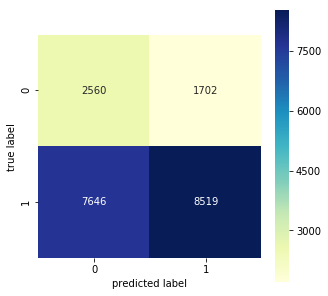

In [46]:
# prediction on testing set
ypred_logistic_lite = grid_logistic_lite.predict(X_test_lite)

# confusion matrix
matrix_logistic_lite = confusion_matrix(y_test, ypred_logistic_lite)
print(matrix_logistic_lite)

# visualization
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(matrix_logistic_lite, square=True, annot=True, cmap='YlGnBu',fmt="d")
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.savefig('confusionmatrix1.png')

In [47]:
# classification report
print(classification_report(y_test_lite, ypred_logistic_lite))

             precision    recall  f1-score   support

          0       0.25      0.60      0.35      4262
          1       0.83      0.53      0.65     16165

avg / total       0.71      0.54      0.58     20427



In [48]:
# accuracy score
accuracy_score(y_test_lite, ypred_logistic_lite)

0.5423703921280658

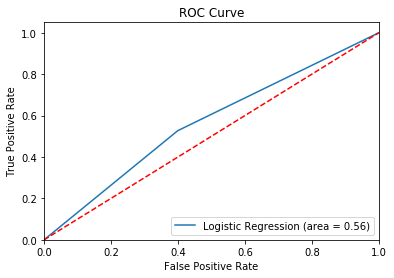

In [49]:
# ROC curve
logistic_probs_lite = grid_logistic_lite.predict_proba(X_test_lite)
logistic_probs_lite = logistic_probs_lite[:,1]
fpr, tpr, threshold = roc_curve(y_test_lite, ypred_logistic_lite)
logistic_roc_auc_lite = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc_lite)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [121]:
# visualize the coefficient
def visualize_coefficients(coefficients, feature_names, n_top_features=10):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(20, 8))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")
    plt.savefig('coeficient.png')

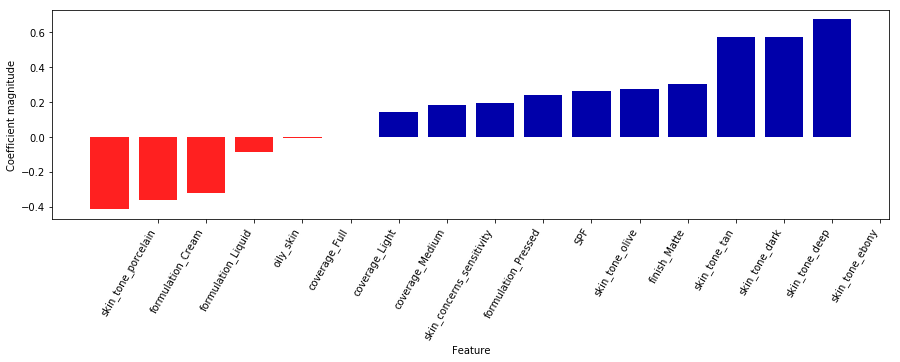

In [51]:
lrcoefs_lite = LogisticRegression(C=0.1, penalty='l1').fit(X_train_lite,y_train_lite).coef_
lrfeature_names_lite = X_train_lite.columns


visualize_coefficients(lrcoefs_lite, lrfeature_names_lite, n_top_features=8)

#### With review text

In [52]:
# list the parameters
param_grid_logistic = {'C': [0.01, 0.1, 1, 10, 100],
                      'penalty':['l1', 'l2']}

# tuning parameters using cross-validation
grid_logistic = GridSearchCV(LogisticRegression(random_state=43), param_grid=param_grid_logistic, cv=10,n_jobs=-1)

# fit the model
grid_logistic.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=43, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
# best parameter and score
print("Best parameters: ", grid_logistic.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_logistic.best_score_))
print("Best test-set score: {:.3f}".format(grid_logistic.score(X_test, y_test)))

Best parameters:  {'C': 100, 'penalty': 'l1'}
Best cross-validation score: 0.80
Best test-set score: 0.813


[[ 3325   937]
 [ 2891 13274]]


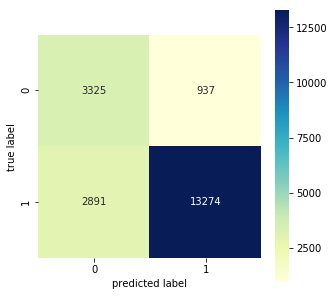

In [54]:
# prediction on testing set
ypred_logistic = grid_logistic.predict(X_test)

# confusion matrix
matrix_logistic = confusion_matrix(y_test, ypred_logistic)
print(matrix_logistic)

# visualization
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(matrix_logistic, square=True, annot=True, cmap='YlGnBu',fmt="d")
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.savefig('confusionmatrix2.png')

In [55]:
# classification report
print(classification_report(y_test, ypred_logistic))

             precision    recall  f1-score   support

          0       0.53      0.78      0.63      4262
          1       0.93      0.82      0.87     16165

avg / total       0.85      0.81      0.82     20427



In [56]:
# accuracy score
accuracy_score(y_test, ypred_logistic)

0.8126009693053312

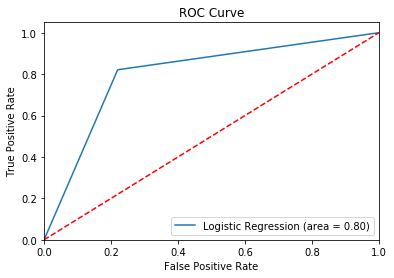

In [57]:
# ROC curve
logistic_probs = grid_logistic.predict_proba(X_test)
logistic_probs = logistic_probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, ypred_logistic)
logistic_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

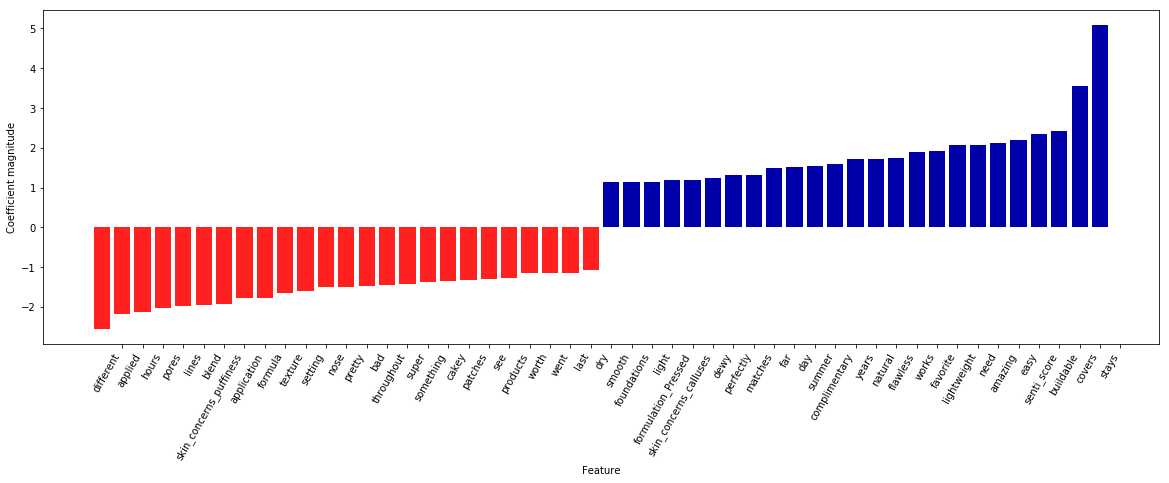

In [127]:
lrcoefs = LogisticRegression(C=100, penalty='l1').fit(X_test,y_test).coef_
lrfeature_names = X_test.columns


visualize_coefficients(lrcoefs, lrfeature_names, n_top_features=25)

### 2.2 SVM

#### without review text

In [74]:
# list the parameters
param_grid_svc_lite = {'base_estimator__C': [1, 5, 10, 50],
                       'base_estimator__gamma': [0.0005, 0.001]}

# tuning parameters using cross-validation
grid_svc_lite = GridSearchCV(BaggingClassifier(SVC(kernel='rbf', random_state=101), max_samples=1.0 / 5,n_estimators=5), param_grid=param_grid_svc_lite, cv=10, n_jobs=-1)

# fit the model
grid_svc_lite.fit(X_train_lite, y_train_lite)

GridSearchCV(cv=10, error_score='raise',
       estimator=BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.2, n_estimators=5, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator__C': [1, 5, 10, 50], 'base_estimator__gamma': [0.0005, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
# best parameter and score
print("Best parameters: ", grid_svc_lite.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_svc_lite.best_score_))
print("Best test-set score: {:.3f}".format(grid_svc_lite.score(X_test_lite, y_test_lite)))

Best parameters:  {'base_estimator__C': 50, 'base_estimator__gamma': 0.0005}
Best cross-validation score: 0.55
Best test-set score: 0.550


[[2466 1796]
 [7391 8774]]


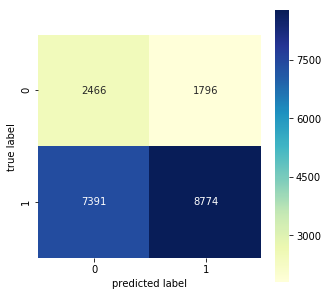

In [77]:
# prediction on testing set
ypred_svc_lite = grid_svc_lite.predict(X_test_lite)

# confusion matrix
matrix_svc_lite = confusion_matrix(y_test_lite, ypred_svc_lite)
print(matrix_svc_lite)

# visualization
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(matrix_svc_lite, square=True, annot=True, cmap='YlGnBu',fmt="d")
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.savefig('confusionmatrix7.png')

In [78]:
# classification report
print(classification_report(y_test_lite, ypred_svc_lite))

             precision    recall  f1-score   support

          0       0.25      0.58      0.35      4262
          1       0.83      0.54      0.66     16165

avg / total       0.71      0.55      0.59     20427



In [ ]:
# accuracy score
accuracy_score(y_test_lite, ypred_svc_lite)

In [ ]:
# ROC curve
svc_probs_lite = grid_svc_lite.predict_proba(X_test_lite)
svc_probs_lite = svc_probs_lite[:,1]
fpr, tpr, threshold = roc_curve(y_test_lite, ypred_svc_lite)
svc_roc_auc_lite = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machines (area = %0.2f)' % svc_roc_auc_lite)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### with review text

In [79]:
# list the parameters
param_grid_svc = {'base_estimator__C': [1, 5, 10]}

# tuning parameters using cross-validation
grid_svc = GridSearchCV(BaggingClassifier(SVC(kernel='linear', random_state=101), max_samples=1.0 / 5,n_estimators=5), param_grid=param_grid_svc, cv=10, n_jobs=-1)

# fit the model
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.2, n_estimators=5, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator__C': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
# best parameter and score
print("Best parameters: ", grid_svc.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Best test-set score: {:.3f}".format(grid_svc.score(X_test, y_test)))

Best parameters:  {'base_estimator__C': 10}
Best cross-validation score: 0.80
Best test-set score: 0.817


[[ 3289   973]
 [ 2775 13390]]


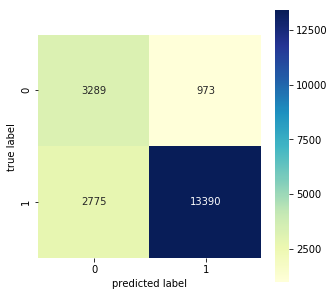

In [81]:
# prediction on testing set
ypred_svc = grid_svc.predict(X_test)

# confusion matrix
matrix_svc = confusion_matrix(y_test, ypred_svc)
print(matrix_svc)

# visualization
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(matrix_svc, square=True, annot=True, cmap='YlGnBu',fmt="d")
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.savefig('confusionmatrix8.png')

In [82]:
# classification report
print(classification_report(y_test, ypred_svc))

             precision    recall  f1-score   support

          0       0.54      0.77      0.64      4262
          1       0.93      0.83      0.88     16165

avg / total       0.85      0.82      0.83     20427



### 2.3 Random Forest Tree

#### without review text

In [59]:
# list the parameters
param_grid_rf_lite = {'n_estimators': [100, 200, 400]}

# tuning parameters using cross-validation
grid_rf_lite = GridSearchCV(RandomForestClassifier(random_state=46, n_jobs=-1), param_grid=param_grid_rf_lite, cv=10,n_jobs=-1)

# fit the model
grid_rf_lite.fit(X_train_lite, y_train_lite)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=46, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
# best parameter and score
print("Best parameters: ", grid_rf_lite.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_rf_lite.best_score_))
print("Best test-set score: {:.3f}".format(grid_rf_lite.score(X_test_lite, y_test_lite)))

Best parameters:  {'n_estimators': 100}
Best cross-validation score: 0.55
Best test-set score: 0.540


[[2549 1713]
 [7689 8476]]


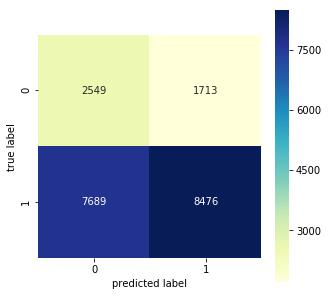

In [61]:
# prediction on testing set
ypred_rf_lite = grid_rf_lite.predict(X_test_lite)

# confusion matrix
matrix_rf_lite = confusion_matrix(y_test_lite, ypred_rf_lite)
print(matrix_rf_lite)

# visualization
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(matrix_rf_lite, square=True, annot=True, cmap='YlGnBu',fmt="d")
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.savefig('confusionmatrix3.png')

In [62]:
# classification report
print(classification_report(y_test_lite, ypred_rf_lite))

             precision    recall  f1-score   support

          0       0.25      0.60      0.35      4262
          1       0.83      0.52      0.64     16165

avg / total       0.71      0.54      0.58     20427



In [63]:
# accuracy score
accuracy_score(y_test_lite, ypred_rf_lite)

0.5397268321339403

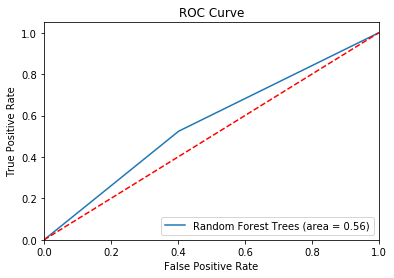

In [64]:
# ROC curve
rf_probs_lite = grid_rf_lite.predict_proba(X_test_lite)
rf_probs_lite = rf_probs_lite[:,1]
fpr, tpr, threshold = roc_curve(y_test_lite, ypred_rf_lite)
rf_roc_auc_lite = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest Trees (area = %0.2f)' % rf_roc_auc_lite)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

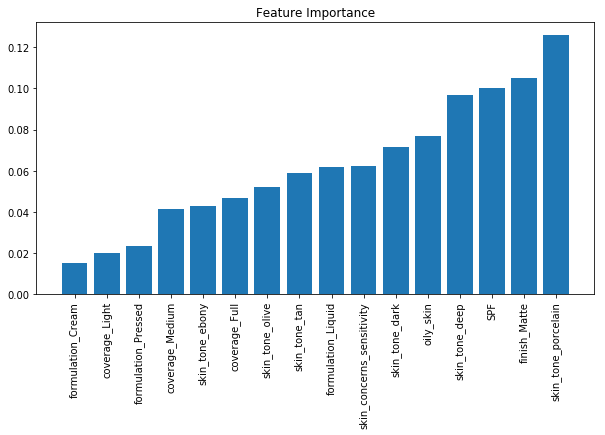

In [67]:
# feature importance
bestrf_lite = RandomForestClassifier(n_estimators = 100, random_state=1).fit(X_train_lite,y_train_lite)
importances = bestrf_lite.feature_importances_

# visualization
# Sort feature importances in descending order
indices = np.argsort(importances)[:]

# Get feature names
feature_names = X_train_lite.columns

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(16), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(16), names, rotation=90)

# Show plot
plt.show()

#### with review text

In [66]:
# list the parameters
param_grid_rf = {'n_estimators': [100, 200, 400]}

# tuning parameters using cross-validation
grid_rf = GridSearchCV(RandomForestClassifier(random_state=47, n_jobs=-1), param_grid=param_grid_rf, cv=10,n_jobs=-1)

# fit the model
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
# best parameter and score
print("Best parameters: ", grid_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_rf.best_score_))
print("Best test-set score: {:.3f}".format(grid_rf.score(X_test, y_test)))

Best parameters:  {'n_estimators': 400}
Best cross-validation score: 0.80
Best test-set score: 0.816


[[ 3302   960]
 [ 2807 13358]]


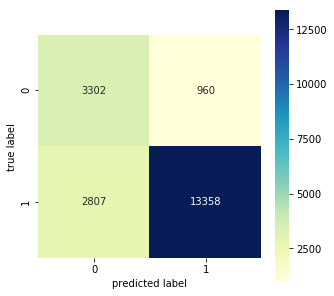

In [69]:
# prediction on testing set
ypred_rf = grid_rf.predict(X_test)

# confusion matrix
matrix_rf = confusion_matrix(y_test, ypred_rf)
print(matrix_rf)

# visualization
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(matrix_rf, square=True, annot=True, cmap='YlGnBu',fmt="d")
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.savefig('confusionmatrix4.png')

In [70]:
# classification report
print(classification_report(y_test, ypred_rf))

             precision    recall  f1-score   support

          0       0.54      0.77      0.64      4262
          1       0.93      0.83      0.88     16165

avg / total       0.85      0.82      0.83     20427



In [71]:
# accuracy score
accuracy_score(y_test, ypred_rf)

0.8155872130023988

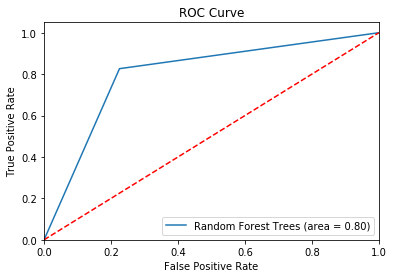

In [72]:
# ROC curve
rf_probs = grid_rf.predict_proba(X_test)
rf_probs = rf_probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, ypred_rf)
rf_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest Trees (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [129]:
# feature importance
bestrf = RandomForestClassifier(n_estimators = 400, random_state=1).fit(X_test,y_test)
importances2 = bestrf.feature_importances_

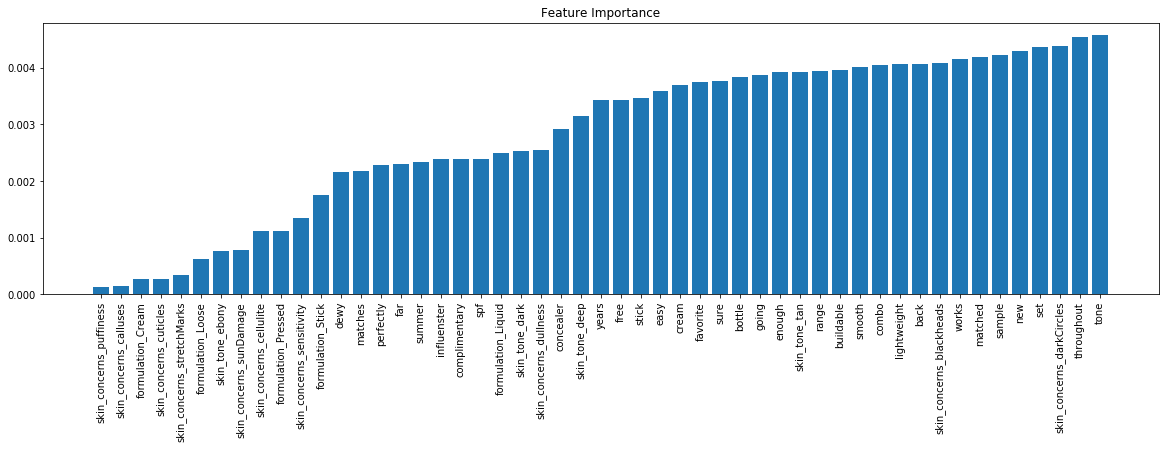

In [135]:
# visualization
# Sort feature importances in descending order
indices2 = np.argsort(importances2)[:51]

# Get feature names
feature_names2 = X_test.columns

# Rearrange feature names so they match the sorted feature importances
names2 = [feature_names2[i] for i in indices2]

# Create plot
plt.figure(figsize=(20, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(len(indices2)), importances2[indices2])

# Add feature names as x-axis labels
plt.xticks(range(len(indices2)), names2, rotation=90)

# Show plot
plt.savefig('feature importance.png')

### 2.4 Neural Network

#### without review text

In [83]:
# one hot encode y_train and y_test using to_categorical()
le.fit(y_train_lite)
new_y_train_lite = le.transform(y_train_lite)

le.fit(y_test_lite)
new_y_test_lite = le.transform(y_test_lite)

encoded_y_train_lite = to_categorical(new_y_train_lite)
encoded_y_test_lite = to_categorical(new_y_test_lite)

In [84]:
# build model
input_dim_lite = X_train_lite.shape[1]
num_classes = 2

def create_model(neurons):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim_lite, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    sgd = SGD(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

#call model function in KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
param_grid_nn_lite = {'neurons':[10, 20, 30],
                   'epochs':[40, 60],
                   'batch_size':[600, 800]}
grid_nn_lite = GridSearchCV(estimator=model, param_grid=param_grid_nn_lite)
grid_nn_lite.fit(X_train_lite, encoded_y_train_lite)

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x3093537f0>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'neurons': [10, 20, 30], 'epochs': [40, 60], 'batch_size': [600, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
# best parameter and score
print("Best parameters: ", grid_nn_lite.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_nn_lite.best_score_))
print("Best test-set score: {:.3f}".format(grid_nn_lite.score(X_test_lite, encoded_y_test_lite)))

Best parameters:  {'batch_size': 800, 'epochs': 60, 'neurons': 20}
Best cross-validation score: 0.18
Best test-set score: 0.541


[[2311 1951]
 [7420 8745]]


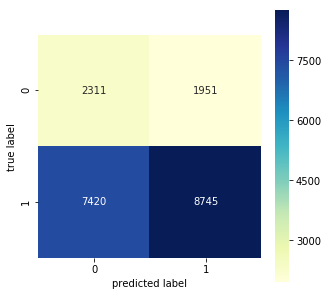

In [86]:
# prediction on testing set
ypred_nn_lite = grid_nn_lite.predict(X_test_lite)

# confusion matrix
matrix_nn_lite = confusion_matrix(encoded_y_test_lite.argmax(axis=1), ypred_nn_lite)
print(matrix_nn_lite)

# visualization
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(matrix_nn_lite, square=True, annot=True, cmap='YlGnBu',fmt="d")
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.savefig('confusionmatrix5.png')

In [87]:
# classification report
print(classification_report(encoded_y_test_lite.argmax(axis=1), ypred_nn_lite))

             precision    recall  f1-score   support

          0       0.24      0.54      0.33      4262
          1       0.82      0.54      0.65     16165

avg / total       0.70      0.54      0.58     20427



In [97]:
# define model
model_lite = Sequential()
model_lite.add(Dense(20, input_dim=input_dim_lite, activation='relu'))
model_lite.add(Dense(20, activation='relu'))
model_lite.add(Dense(2, activation='softmax'))
# compile model
sgd = SGD(lr=0.01)
model_lite.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# fit model
history_lite = model_lite.fit(X_train_lite, encoded_y_train_lite, validation_data=(X_test_lite, encoded_y_test_lite), epochs=60, batch_size=800, verbose=0)

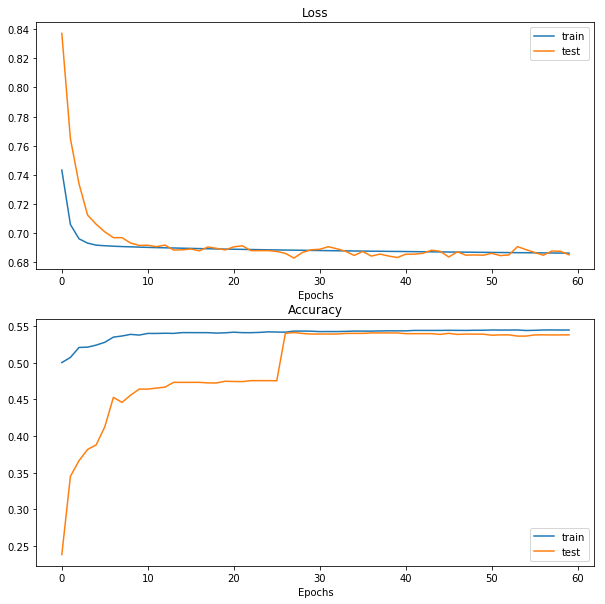

In [98]:
plt.figure(figsize=(10, 10))

plt.subplot(211)

plt.title('Loss')
plt.plot(history_lite.history['loss'], label='train')
plt.plot(history_lite.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(212)

plt.title('Accuracy')
plt.plot(history_lite.history['acc'], label='train')
plt.plot(history_lite.history['val_acc'], label='test')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('Loss & Accuracy1.png')

#### with review text

In [90]:
# one hot encode y_train and y_test using to_categorical()
le.fit(y_train)
new_y_train = le.transform(y_train)

le.fit(y_test)
new_y_test = le.transform(y_test)

encoded_y_train = to_categorical(new_y_train)
encoded_y_test = to_categorical(new_y_test)

In [91]:
# build model
input_dim = X_train.shape[1]
num_classes = 2

def create_model(neurons):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    sgd = SGD(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

#call model function in KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
param_grid_nn = {'neurons':[10, 20, 30],
                   'epochs':[40, 60],
                   'batch_size':[600, 800]}
grid_nn = GridSearchCV(estimator=model, param_grid=param_grid_nn)
grid_nn.fit(X_train, encoded_y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x1a89e3c6d8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'neurons': [10, 20, 30], 'epochs': [40, 60], 'batch_size': [600, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [92]:
# best parameter and score
print("Best parameters: ", grid_nn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_nn.best_score_))
print("Best test-set score: {:.3f}".format(grid_nn.score(X_test, encoded_y_test)))

Best parameters:  {'batch_size': 600, 'epochs': 60, 'neurons': 10}
Best cross-validation score: 0.49
Best test-set score: 0.805


[[ 3026  1236]
 [ 2743 13422]]


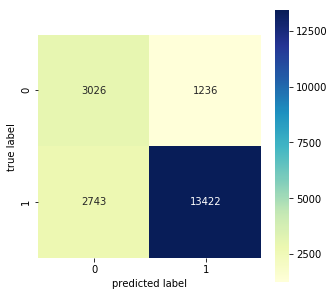

In [93]:
# prediction on testing set
ypred_nn = grid_nn.predict(X_test)

# confusion matrix
matrix_nn = confusion_matrix(encoded_y_test.argmax(axis=1), ypred_nn)
print(matrix_nn)

# visualization
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(matrix_nn, square=True, annot=True, cmap='YlGnBu',fmt="d")
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.savefig('confusionmatrix6.png')

In [94]:
# classification report
print(classification_report(encoded_y_test.argmax(axis=1), ypred_nn))

             precision    recall  f1-score   support

          0       0.52      0.71      0.60      4262
          1       0.92      0.83      0.87     16165

avg / total       0.83      0.81      0.82     20427



In [95]:
# define model
model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile model
sgd = SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# fit model
history = model.fit(X_train, encoded_y_train, validation_data=(X_test, encoded_y_test), epochs=60, batch_size=600, verbose=0)

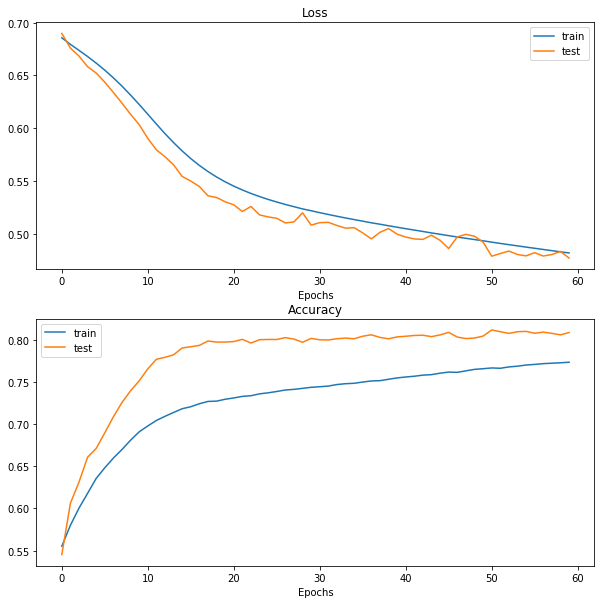

In [96]:
plt.figure(figsize=(10, 10))

plt.subplot(211)

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(212)

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('Loss & Accuracy2.png')

In [111]:
# logistic regression
logistic_probs_lite = grid_logistic_lite.predict_proba(X_test_lite)
logistic_probs_lite = logistic_probs_lite[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test_lite, ypred_logistic_lite)
logistic_roc_auc_lite = auc(fpr1, tpr1)


# random forest
rf_probs_lite = grid_rf_lite.predict_proba(X_test_lite)
rf_probs_lite = rf_probs_lite[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test_lite, ypred_rf_lite)
rf_roc_auc_lite = auc(fpr2, tpr2)


# SVM
svc_probs_lite = grid_svc_lite.predict_proba(X_test_lite)
svc_probs_lite = svc_probs_lite[:,1]
fpr3, tpr3, threshold3 = roc_curve(y_test_lite, ypred_svc_lite)
svc_roc_auc_lite = auc(fpr3, tpr3)



# neural network
nn_probs_lite = grid_nn_lite.predict_proba(X_test_lite)
nn_probs_lite = nn_probs_lite[:,1]
fpr4, tpr4, threshold4 = roc_curve(y_test_lite, ypred_nn_lite)
nn_roc_auc_lite = auc(fpr4, tpr4)

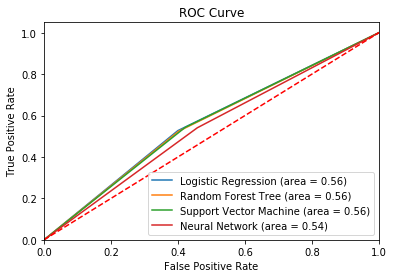

In [118]:
# plot the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc_lite)
plt.plot(fpr2, tpr2, label='Random Forest Tree (area = %0.2f)' % rf_roc_auc_lite)
plt.plot(fpr3, tpr3, label='Support Vector Machine (area = %0.2f)' % svc_roc_auc_lite)
plt.plot(fpr4, tpr4, label='Neural Network (area = %0.2f)' % nn_roc_auc_lite)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('ROC Curve1.png')

In [108]:
grid_nn_lite.predict_proba(X_test_lite)

array([[0.54182017, 0.4581799 ],
       [0.54182017, 0.4581799 ],
       [0.58438635, 0.41561365],
       ...,
       [0.46890026, 0.5310997 ],
       [0.50513047, 0.49486956],
       [0.52735007, 0.47264993]], dtype=float32)

In [115]:
# logistic regression
logistic_probs = grid_logistic.predict_proba(X_test)
logistic_probs = logistic_probs[:,1]
fpr5, tpr5, threshold5 = roc_curve(y_test, ypred_logistic)
logistic_roc_auc = auc(fpr5, tpr5)


# random forest
rf_probs = grid_rf.predict_proba(X_test)
rf_probs = rf_probs[:,1]
fpr6, tpr6, threshold6 = roc_curve(y_test, ypred_rf)
rf_roc_auc = auc(fpr6, tpr6)


# SVM
svc_probs = grid_svc.predict_proba(X_test)
svc_probs = svc_probs[:,1]
fpr7, tpr7, threshold7 = roc_curve(y_test, ypred_svc)
svc_roc_auc = auc(fpr7, tpr7)



# neural network
nn_probs = grid_nn.predict_proba(X_test)
nn_probs = nn_probs[:,1]
fpr8, tpr8, threshold8 = roc_curve(y_test, ypred_nn)
nn_roc_auc = auc(fpr8, tpr8)

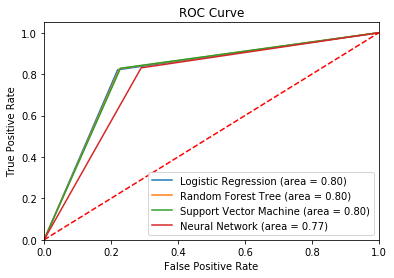

In [117]:
# plot the ROC curve
plt.figure()
plt.plot(fpr5, tpr5, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot(fpr6, tpr6, label='Random Forest Tree (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr7, tpr7, label='Support Vector Machine (area = %0.2f)' % svc_roc_auc)
plt.plot(fpr8, tpr8, label='Neural Network (area = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('ROC Curve2.png')

In [126]:
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # create plot
    plt.figure(figsize=(20, 8))
    colors = ['#ff2020' if c < 0 else '#0000aa' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")
    plt.savefig('SVM coeficient.png')

In [139]:
SVM = SVC(kernel='linear', C=10, random_state=101).fit(X_test,y_test)
svmfeature_names = X_test.columns

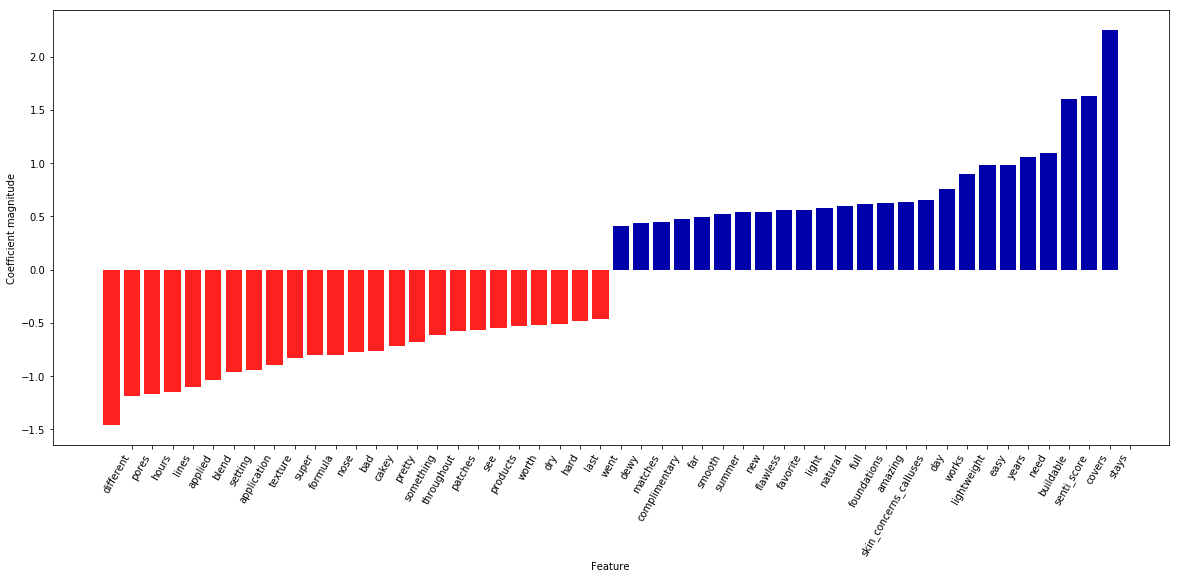

In [140]:
plot_coefficients(SVM, svmfeature_names, top_features=25)